In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np

%matplotlib inline

In [2]:
address = "D:\Documents\Year 4\SESA6083 - Data-Driven Methods for Flow Analysis\Coursework 1"

# load grid information
x, y = np.loadtxt(address+"/xy.txt").T

# load the entire u-component dataset
u = np.loadtxt(address+"/u_steady-100.txt")
u = u[:,-300:]
# load the entire u-component dataset
v = np.loadtxt(address+"/v_steady-100.txt")
v = v[:,-300:]
# load snapshot timecodes
t= np.loadtxt(address+"/times.txt")
t = t[-300:]

dt = t[1] - t[0]

th = np.linspace(0,2*np.pi,100)

(16367,) (16367,) (16367, 300)


Text(0, 0.5, 'y/c')

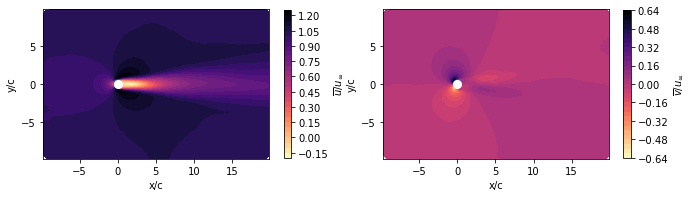

In [91]:
# Question 1

print(x.shape, y.shape, u.shape)

# calculate u mean
u_mean = np.mean(u, axis=1)
# calculate v mean
v_mean = np.mean(v, axis=1)

plt.figure(1, figsize=(10, 5))
plt.subplots_adjust(top=0.96, hspace=0.1, bottom=0.05, right=0.99)
plt.clf()

# plot u mean
plt.subplot(121)
plt.gca().set_aspect(1)
plt.tricontourf(x,y,u_mean,30,cmap = "magma_r")
plt.plot(0.5*np.cos(th), 0.5*np.sin(th))
plt.plot([0], [0], "wo", ms=8)
plt.colorbar(shrink=0.45, label="$\\overline{u}/u_{\infty}$")
plt.xlabel("x/c")
plt.ylabel("y/c")

# plot v mean
plt.subplot(122)
plt.gca().set_aspect(1)
plt.tricontourf(x,y,v_mean,30,cmap = "magma_r")
plt.plot(0.5*np.cos(th), 0.5*np.sin(th))
plt.plot([0], [0], "wo", ms=8)
plt.colorbar(shrink=0.45, label="$\\overline{v}/u_{\infty}$")
plt.xlabel("x/c")
plt.ylabel("y/c")

(16367,)


Text(0, 0.5, 'y/c')

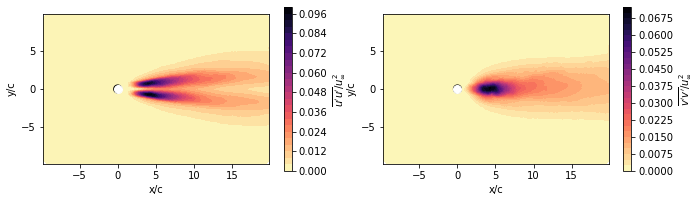

In [92]:
# Question 2

u_var = np.var(u, axis=1)
v_var = np.var(v, axis=1)
print(u_var.shape)

plt.figure(2, figsize=(10, 5))
plt.subplots_adjust(top=0.96, hspace=0.1, bottom=0.05, right=0.99)
plt.clf()

plt.subplot(121)
plt.tricontourf(x,y,u_var,30,cmap = "magma_r")
plt.gca().set_aspect(1)
plt.plot(0.5*np.cos(th), 0.5*np.sin(th), "k")
plt.plot([0], [0], "wo", ms=8)
plt.colorbar(shrink=0.5, label="$\\overline{u^\prime u^\prime}/u_\infty^2$")
#print(np.var(u[:,i]))
plt.xlabel("x/c")
plt.ylabel("y/c")

plt.subplot(122)
plt.tricontourf(x,y,v_var,30,cmap = "magma_r")
#print(np.var(v[:,i]))
plt.gca().set_aspect(1)
plt.plot(0.5*np.cos(th), 0.5*np.sin(th), "k")
plt.plot([0], [0], "wo", ms=8)
plt.colorbar(shrink=0.5, label="$\\overline{v^\prime v^\prime}/u_\infty^2$")
plt.xlabel("x/c")
plt.ylabel("y/c")

In [5]:
# Question 3

X = np.vstack( (np.hstack([np.reshape(u[i], (-1,1)) for i in range(len(u))]).T,
                np.hstack([np.reshape(v[i], (-1,1)) for i in range(len(u))]).T))

Text(0, 0.5, 'space')

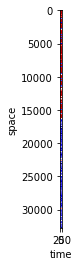

In [6]:
plt.figure(31)
plt.clf()

plt.imshow(X, interpolation="none", cmap="seismic");
plt.xlabel("time")
plt.ylabel("space")

In [7]:
# transform mean flow into a vector
x_bar = np.reshape(np.mean(X,axis=1), (-1,1))

In [8]:
# compute fluctuation
Xp = X - x_bar

[10.43760582 10.3501618   9.83582143 ... -3.38865357  0.35322419
 -0.59815127]
[-0.02866779 -0.07514838 -4.65457286 ... -3.55814677 -0.74131209
  1.50107466]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

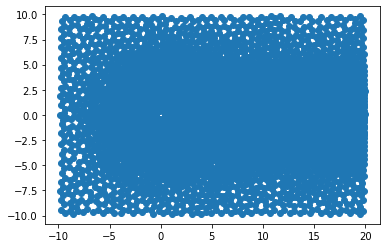

In [9]:
# print(x[0]-x[1])
# print(y[1]-y[2])
print(x)
print(y)
plt.scatter(x, y)
plt.plot

In [10]:
# load the entire u-component dataset
A_c = np.loadtxt(address+"/cell-volumes.txt")

In [11]:
import scipy.sparse as ssp

In [12]:
W = ssp.diags(np.append(A_c,A_c))
print(W.shape)
print(A_c)

(32734, 32734)
[0.01978759 0.02217547 0.10166018 ... 0.05351191 0.00061146 0.00360704]


In [13]:
X[:, 0].T @ W @ X[:, 0]
# note: @ replaces np.dot

626.6074292003301

In [14]:
# TASK: compute factor of the Cholesky decomposition
L = ssp.diags(np.append(A_c,A_c)**0.5)

# and its inverse
Linv = ssp.diags(1/np.append(A_c,A_c)**0.5)

In [15]:
# TASK: compute the svd of an appropriate matrix
U, S, VT = np.linalg.svd(L.T @ Xp, full_matrices=False)

In [16]:
U.shape

(32734, 300)

In [17]:
PHI = Linv.T @ U
PHI.shape #same shape as U

(32734, 300)

In [18]:
PHI_u = PHI[:len(x), :]
PHI_v = PHI[len(y):, :]

print(PHI_u[0], PHI_v[0])

[ 2.13690294e-04  1.05824575e-02  2.18318093e-01 -5.02055339e-02
  3.97012836e-02  4.66795415e-03  9.31816391e-02 -2.14990524e-02
  2.99886586e-02 -2.03108166e-02  3.55166345e-02 -2.44246835e-02
  2.66094489e-02  1.31107992e-02  2.11318014e-02 -1.64765314e-02
  2.82636626e-03  7.29837591e-03  1.28965616e-01 -1.60089073e-02
 -8.91091355e-03 -1.39314994e-02  9.92601877e-04 -1.02336188e-01
 -1.07578967e-02 -1.01111044e-02 -5.25680641e-03 -6.71567764e-03
 -1.77705071e-01 -8.61289457e-02  6.99276649e-02 -6.46439105e-02
  4.16406993e-02 -2.68153634e-02  3.55743648e-03 -2.48660572e-01
  4.93260681e-02  8.72598647e-03 -2.34018872e-02  4.65228230e-02
 -8.45165632e-02  3.15024292e-02 -7.53528998e-03 -3.91675323e-02
  1.78451104e-01  1.22308701e-01  4.40500968e-02  7.10555819e-02
 -1.43202864e-02  5.28909962e-02  2.37738820e-02  8.00002148e-02
 -1.56852352e-02  9.57415146e-02  2.32792616e-02  2.83784613e-03
 -4.09071262e-02 -5.79147821e-03 -6.02499985e-02 -3.19453416e-02
  8.98778739e-03 -1.88698

In [19]:
# index of the POD to plot (plot 0, 1, 6, 100)
idx = 0

phi_u = np.reshape(PHI_u[:, idx], (len(x)))
phi_v = np.reshape(PHI_v[:, idx], (len(x)))
print(phi_u.shape, x.shape, y.shape)

(16367,) (16367,) (16367,)


(16367,) (16367,) (16367,)


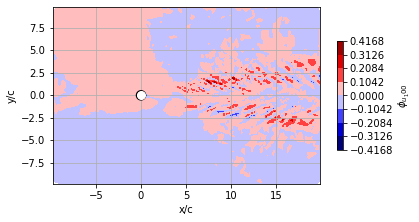

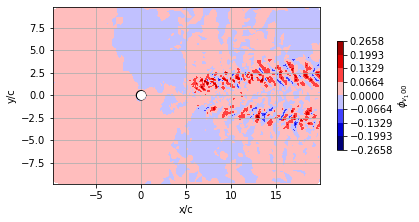

In [20]:
idx = 0

phi_u = np.reshape(PHI_u[:, idx], (len(x)))
phi_v = np.reshape(PHI_v[:, idx], (len(x)))
print(phi_u.shape, x.shape, y.shape)
plt.figure(32)
lim = np.maximum(-phi_u.min(), phi_u.max())
levels = np.linspace(-lim, lim, 9)
plt.tricontourf(x,y, phi_u, levels=levels, cmap="seismic")
# SET ms = 8 IF USING A CIRCLE TO PLOT CYLINDER. 13/11/2022
plt.plot(0.5*np.cos(th), 0.5*np.sin(th), "k")
plt.plot([0], [0], "wo", ms=8)
plt.colorbar(shrink=0.5, label="$\phi_{u_100}$")
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.gca().set_aspect(1)
plt.grid(1)

plt.figure(33)
lim = np.maximum(-phi_v.min(), phi_v.max())
levels = np.linspace(-lim, lim, 9)
plt.tricontourf(x,y, phi_v, levels=levels, cmap="seismic")
# SET ms = 8 IF USING A CIRCLE TO PLOT CYLINDER. 13/11/2022
plt.plot(0.5*np.cos(th), 0.5*np.sin(th), "k")
plt.plot([0], [0], "wo", ms=8)
plt.colorbar(shrink=0.5, label="$\phi_{v_100}$")
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.gca().set_aspect(1)
plt.grid(1)

In [21]:
# Question 4

# Verify orthonormality of POD modes: should be zero
print(np.linalg.norm(PHI.T @ W @ PHI - ssp.diags(np.ones(t.shape[0]))))
# not exactly 0 due to computer floating point accuracy

# Verify orthonormality of left singular vectors: should be non-zero
print(np.linalg.norm(U.T @ W @ U - ssp.diags(np.ones(t.shape[0]))))

3.532762062012245e-14
16.544132729942387


In [22]:
# Question 5

# extract modal energies on the diagonal
lambdas = S**2 / t.shape[0]

In [23]:
def ric(lambdas):
    """ Compute relative information content from the modal energies """
    return np.cumsum(lambdas)/sum(lambdas)

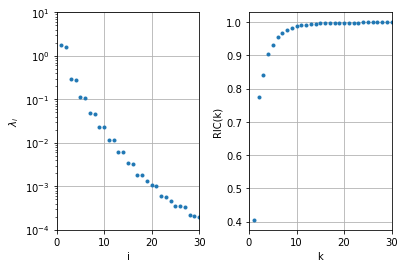

In [24]:
fig = plt.figure(5)
plt.subplots_adjust(wspace=0.35)
plt.clf()

mode_n = 30

# array for plotting starting from 1
i_or_k = np.arange(len(lambdas)) + 1

plt.subplot(121)
plt.plot(i_or_k, lambdas, ".")
plt.ylim(1e-4, 1e1)
plt.xlim(0,mode_n)
plt.grid(1)
plt.xlabel("i")
plt.ylabel("$\lambda_i$")
plt.yscale("log")

plt.subplot(122)
plt.plot(i_or_k, ric(lambdas), ".")
plt.xlim(0,mode_n)
plt.xlabel("k")
plt.ylabel("RIC(k)")
plt.grid(1)

(300, 300) (300, 300)


Text(0.5, 0, '$t u_\\infty / c$')

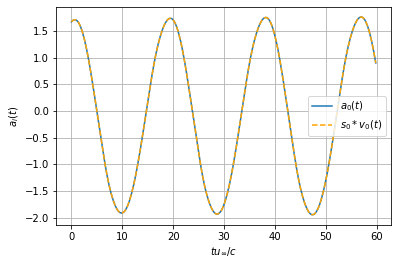

In [25]:
# Question 6

# Temporal coefficients:
A = Xp.T @ W @ PHI
print(A.shape, VT.shape)

plt.figure(6)
plt.clf()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

tt = np.arange(len(t)) * dt

# mode 1
# plt.subplot(2, 1, 1)
plt.plot(tt, A[:, 0], label="$a_0(t)$")
plt.plot(tt, S[0]*VT.T[:, 0], label="$s_0*v_0(t)$",color="orange", linestyle="--")
plt.legend()
plt.grid(1)
plt.ylabel("$a_i(t)$")
plt.xlabel("$t u_\infty / c$")

# mode 2
# plt.subplot(2, 1, 2)
# plt.plot(tt, A[:, 2], label="$a_3(t)$")
# plt.plot(tt, S[2]*VT.T[:, 2], label="$s_3*v_3(t)$",color="orange", linestyle="--")
# plt.legend()
# plt.grid(1)
# plt.ylabel("$a_i(t)$")
# plt.xlabel("$t u_\infty / c$")

In [26]:
# Question 7

# load the entire u-component dataset
u2 = np.loadtxt(address+"/u_steady-200.txt")
u2 = u2[:,-300:]
# load the entire u-component dataset
v2 = np.loadtxt(address+"/v_steady-200.txt")
v2 = v2[:,-300:]

X2 = np.vstack( (np.hstack([np.reshape(u2[i], (-1,1)) for i in range(len(u2))]).T,
                np.hstack([np.reshape(v2[i], (-1,1)) for i in range(len(u2))]).T))
# transform mean flow into a vector
x_bar2 = np.reshape(np.mean(X2,axis=1), (-1,1))
# compute fluctuation
Xp2 = X2 - x_bar2
# TASK: compute the svd of an appropriate matrix
U2, S2, VT2 = np.linalg.svd(L.T @ Xp2, full_matrices=False)
PHI2 = Linv.T @ U2
PHI2.shape #same shape as U
PHI_u2 = PHI2[:len(x), :]
PHI_v2 = PHI2[len(y):, :]

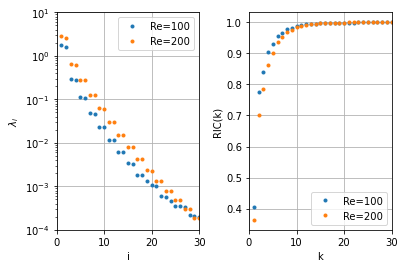

In [27]:
lambdas2 = S2**2 / t.shape[0]

fig = plt.figure(5)
plt.subplots_adjust(wspace=0.35)
plt.clf()
mode_n = 30
# array for plotting starting from 1
i_or_k = np.arange(len(lambdas)) + 1

plt.subplot(121)
plt.plot(i_or_k, lambdas, ".", label="Re=100")
plt.plot(i_or_k, lambdas2, ".", label="Re=200")
plt.ylim(1e-4, 1e1)
plt.xlim(0,mode_n)
plt.legend()
plt.grid(1)
plt.xlabel("i")
plt.ylabel("$\lambda_i$")
plt.yscale("log")

plt.subplot(122)
plt.plot(i_or_k, ric(lambdas), ".", label="Re=100")
plt.plot(i_or_k, ric(lambdas2), ".", label="Re=200")
plt.legend()
plt.xlim(0,mode_n)
plt.xlabel("k")
plt.ylabel("RIC(k)")
plt.grid(1)

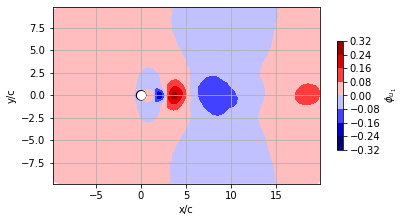

In [28]:
idx = 0
phi_u2 = np.reshape(PHI_u2[:, idx], (len(x)))
phi_v2 = np.reshape(PHI_v2[:, idx], (len(x)))
plt.tricontourf(x,y, phi_v2, cmap="seismic")
plt.plot(0.5*np.cos(th), 0.5*np.sin(th), "k")
plt.plot([0], [0], "wo", ms=8)
plt.colorbar(shrink=0.5, label="$\phi_{u_1}$")
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.gca().set_aspect(1)
plt.grid(1)

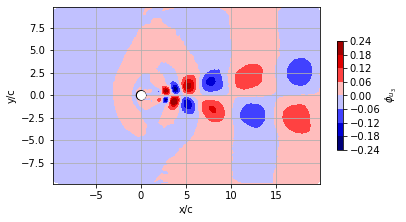

In [29]:
idx = 2
phi_u2 = np.reshape(PHI_u2[:, idx], (len(x)))
phi_v2 = np.reshape(PHI_v2[:, idx], (len(x)))
plt.tricontourf(x,y, phi_v2, cmap="seismic")
plt.plot(0.5*np.cos(th), 0.5*np.sin(th), "k")
plt.plot([0], [0], "wo", ms=8)
plt.colorbar(shrink=0.5, label="$\phi_{u_3}$")
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.gca().set_aspect(1)
plt.grid(1)

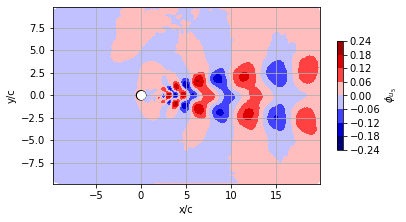

In [30]:
idx = 4
phi_u2 = np.reshape(PHI_u2[:, idx], (len(x)))
phi_v2 = np.reshape(PHI_v2[:, idx], (len(x)))
plt.tricontourf(x,y, phi_v2, cmap="seismic")
plt.plot(0.5*np.cos(th), 0.5*np.sin(th), "k")
plt.plot([0], [0], "wo", ms=8)
plt.colorbar(shrink=0.5, label="$\phi_{u_5}$")
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.gca().set_aspect(1)
plt.grid(1)

In [31]:
# Question 8

# load the entire u-component dataset
u3 = np.loadtxt(address+"/u_rotating-100.txt")
u3 = u3[:,-300:]
# load the entire u-component dataset
v3 = np.loadtxt(address+"/v_rotating-100.txt")
v3 = v3[:,-300:]

X3 = np.vstack( (np.hstack([np.reshape(u3[i], (-1,1)) for i in range(len(u2))]).T,
                np.hstack([np.reshape(v3[i], (-1,1)) for i in range(len(u2))]).T))
# transform mean flow into a vector
x_bar3 = np.reshape(np.mean(X3,axis=1), (-1,1))
# compute fluctuation
Xp3 = X3 - x_bar3
# TASK: compute the svd of an appropriate matrix
U3, S3, VT3 = np.linalg.svd(L.T @ Xp3, full_matrices=False)
PHI3 = Linv.T @ U3
PHI3.shape #same shape as U
PHI_u3 = PHI3[:len(x), :]
PHI_v3 = PHI3[len(y):, :]

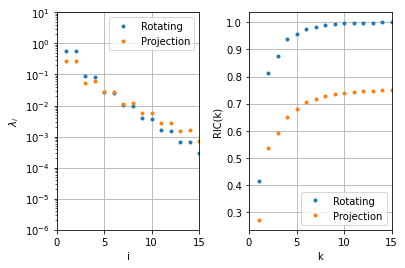

In [32]:
A3 = Xp3.T @ W @ PHI

lambdas_proj = np.var(A3, axis=0)
lambdas3 = S3**2 / t.shape[0]

fig = plt.figure(5)
plt.subplots_adjust(wspace=0.35)
plt.clf()
mode_n = 15

# array for plotting starting from 1
i_or_k = np.arange(len(lambdas3)) + 1

plt.subplot(121)
plt.plot(i_or_k, lambdas3, ".", label="Rotating")
plt.plot(i_or_k, lambdas_proj, ".", label="Projection")
plt.ylim(1e-6, 1e1)
plt.xlim(0,mode_n)
plt.legend()
plt.grid(1)
plt.xlabel("i")
plt.ylabel("$\lambda_i$")
plt.yscale("log")

plt.subplot(122)
plt.plot(i_or_k, ric(lambdas3), ".", label="Rotating")
plt.plot(i_or_k, ric(lambdas_proj), ".", label="Projection")
plt.legend()
plt.xlim(0,mode_n)
plt.xlabel("k")
plt.ylabel("RIC(k)")
plt.grid(1)

# Modal energies of projections compared to first 15 POD modal energies

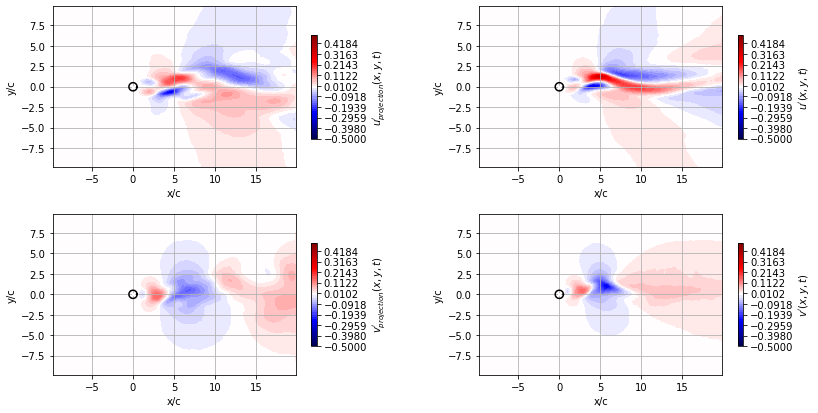

In [112]:
# number of modes used for reconstruction
k = 15
# chosen snapshot
snapshot = 15

Xp_proj = PHI[:, :k] @ A3[:, :k].T
Xp_r3 = PHI3[:, :k] @ A3[:, :k].T

plt.figure(10, figsize=(14, 7))
plt.subplots_adjust(right=0.85, wspace=0.4)
levels = np.linspace(-0.5, 0.5, 50)

plt.clf()

up_r_rot2 = np.reshape(Xp_proj[:len(x), snapshot], (len(x),))
vp_r_rot2 = np.reshape(Xp_proj[len(x):, snapshot], (len(x),))
up_rot = -np.reshape(Xp_r3[:len(x), snapshot], (len(x),))
vp_rot = -np.reshape(Xp_r3[len(x):, snapshot], (len(x),))

# streamwise direction
# plot reconstructed snapshot
plt.subplot(221)

plt.tricontourf(x, y, up_r_rot2, levels, cmap="seismic")
plt.colorbar(shrink=0.6, label="$u^\prime_{projection}(x, y, t)$")
plt.gca().set_aspect(1)
th = np.linspace(0, 2*np.pi, 100)
plt.plot(0.5*np.cos(th), 0.5*np.sin(th), 'black')
plt.plot([0], [0], 'wo', ms=2)
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.grid(1)
# plot actual snapshot
plt.subplot(222)
plt.tricontourf(x, y, up_rot, levels, cmap="seismic")
plt.colorbar(shrink=0.6, label="$u^\prime(x, y, t)$")
plt.gca().set_aspect(1)
th = np.linspace(0, 2*np.pi, 100)
plt.plot(0.5*np.cos(th), 0.5*np.sin(th), 'black')
plt.plot([0], [0], 'wo', ms=2)
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.grid(1)

# transverse direction
# plot reconstructed snapshot
plt.subplot(223)
plt.tricontourf(x, y, vp_r_rot2, levels, cmap="seismic")
plt.colorbar(shrink=0.6, label="$v^\prime_{projection}(x, y, t)$")
plt.gca().set_aspect(1)
th = np.linspace(0, 2*np.pi, 100)
plt.plot(0.5*np.cos(th), 0.5*np.sin(th), 'black')
plt.plot([0], [0], 'wo', ms=2)
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.grid(1)

# plot actual snapshot
plt.subplot(224)
plt.tricontourf(x, y, vp_rot, levels, cmap="seismic")
plt.colorbar(shrink=0.6, label="$v^\prime(x, y, t)$")
plt.gca().set_aspect(1)
th = np.linspace(0, 2*np.pi, 100)
plt.plot(0.5*np.cos(th), 0.5*np.sin(th), 'black')
plt.plot([0], [0], 'wo', ms=2)
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.grid(1)

In [37]:
# Magnus effect?